In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample
from scipy.stats import entropy
from scipy.cluster.hierarchy import linkage, leaves_list
from statsmodels.graphics.mosaicplot import mosaic

In [126]:
MD= pd.read_csv(r"C:\Users\sapto\Downloads\MDonalds.csv")
print(list(MD.columns))
print(MD.shape)
print(MD.head())

md_x = MD.iloc[:, 0:11]
md_x = (md_x == "Yes").astype(int)
column_means=md_x.mean().round(2)
print(column_means)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
yummy         0.55
convenie

Standard deviations (1, .., p=11):
[28.85 23.15 19.23 15.2  12.86 11.82 11.04 10.48 10.11  9.48  9.03]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0

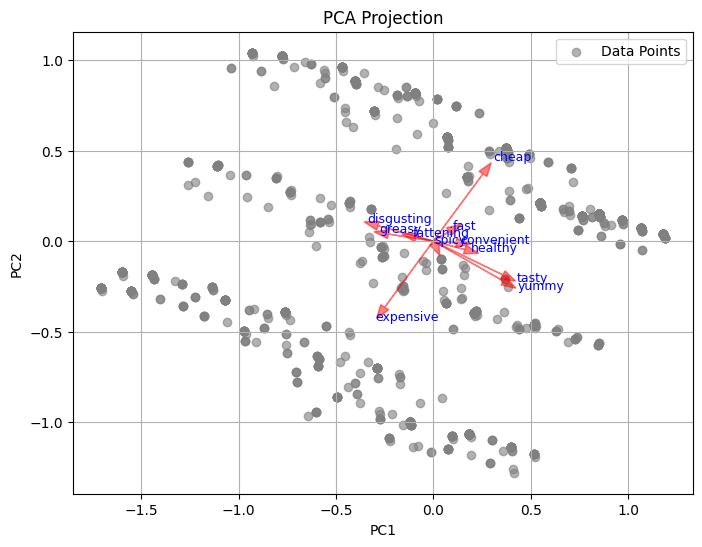

In [52]:
pca=PCA()
md_pca=pca.fit(md_x)
print("Standard deviations (1, .., p=11):")
print(np.round(md_pca.singular_values_, 2))
print("\nRotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(md_pca.components_.T, columns=[f"PC{i+1}" for i in range(md_pca.n_components_)], index=md_x.columns)
print(np.round(rotation_matrix, 2))

explained_variance = md_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
importance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(md_pca.explained_variance_),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f"PC{i+1}" for i in range(md_pca.n_components_)])

print("\nImportance of components:")
print(np.round(importance_df, 4))

md_pca_scores = pca.fit_transform(md_x)
#Plot the PCA scores (first two components)
plt.figure(figsize=(8, 6))
plt.scatter(md_pca_scores[:, 0], md_pca_scores[:, 1], color='grey', alpha=0.6, label='Data Points')
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, feature in enumerate(md_x.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, feature, color='b', fontsize=9)

plt.legend()
plt.grid()
plt.show()


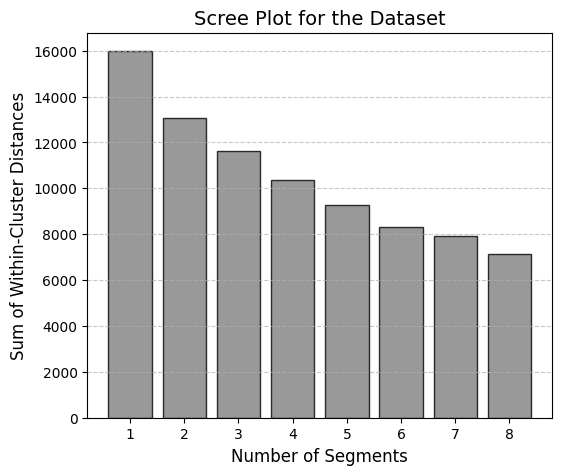

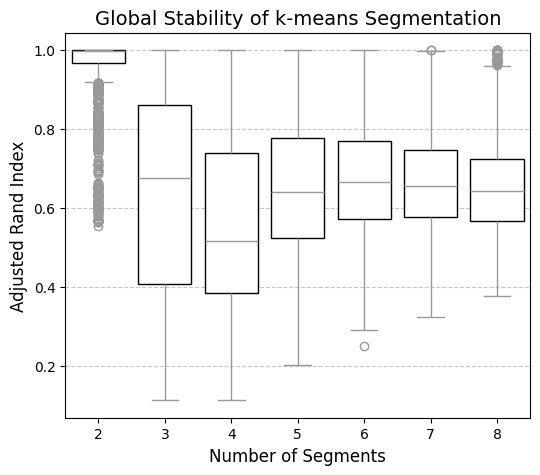

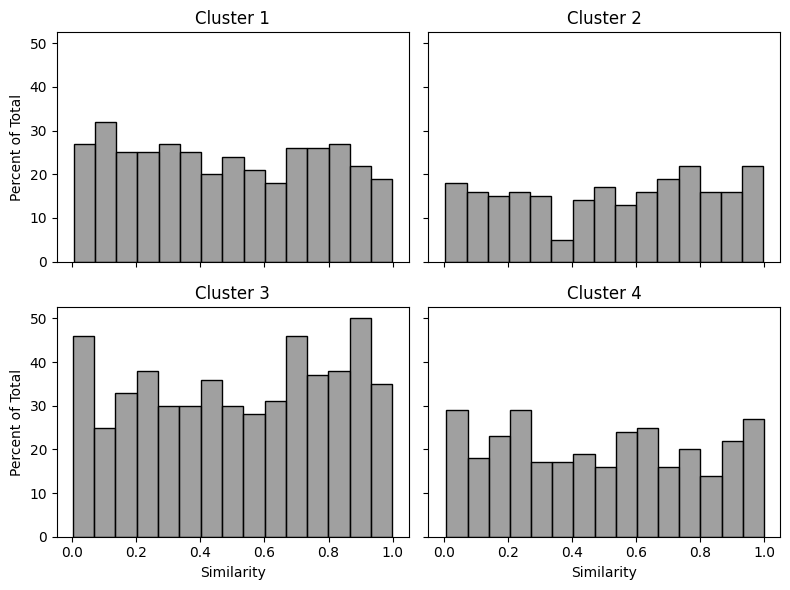

In [ ]:
# Set random seed for reproducibility
np.random.seed(1234)

scaler = StandardScaler()
md_x_scaled = scaler.fit_transform(md_x)

### 1. SCREE PLOT (Elbow Method)
clusters = range(1, 9) 
inertia_values = []

for k in clusters:
    if k == 0:  
        inertia_values.append(np.sum(np.var(md_x_scaled, axis=0)))
    else:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        kmeans.fit(md_x_scaled)
        inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 5))
plt.bar(clusters, inertia_values, color='gray', alpha=0.8, edgecolor='black')
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Sum of Within-Cluster Distances", fontsize=12)
plt.title("Scree Plot for the Dataset", fontsize=14)
plt.xticks(clusters)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. BOOTSTRAPPED CLUSTERING STABILITY (Boxplot of Adjusted Rand Index)
n_boot = 100  
n_rep = 10  
ari_data = []

for k in range(2, 9):
    for _ in range(n_boot):
        X_resampled = resample(md_x_scaled, replace=True)
        labels_list = []
        for _ in range(n_rep):
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
            labels_list.append(kmeans.fit_predict(X_resampled))
        for i in range(len(labels_list)):
            for j in range(i + 1, len(labels_list)):
                ari_data.append({"Number of Segments": k, 
                                 "ARI": adjusted_rand_score(labels_list[i], labels_list[j])})

ari_df = pd.DataFrame(ari_data)

plt.figure(figsize=(6, 5))
sns.boxplot(x="Number of Segments", y="ARI", data=ari_df, color="white", boxprops=dict(edgecolor="black"))
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Adjusted Rand Index", fontsize=12)
plt.title("Global Stability of k-means Segmentation", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. CLUSTER SIMILARITY HISTOGRAMS
k = 4  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(md_x)
similarity_scores = np.random.rand(len(md_x))  
df1 = pd.DataFrame({'Cluster': cluster_labels, 'Similarity': similarity_scores})
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(k):
    cluster_data = df1[df1['Cluster'] == i]['Similarity']
    sns.histplot(cluster_data, bins=15, color="gray", ax=axes[i])
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')

plt.tight_layout()
plt.show()



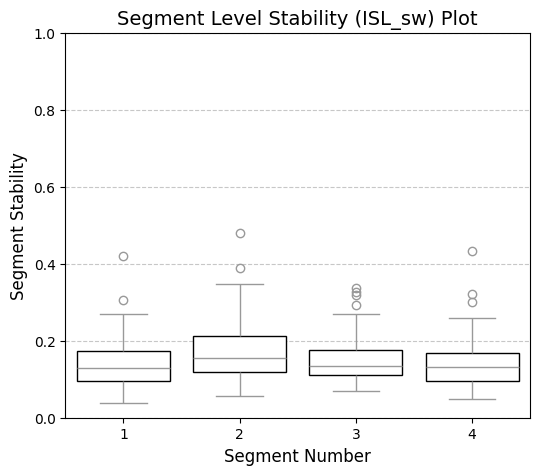

In [54]:
np.random.seed(1234)
scaler = StandardScaler()
md_x_scaled = scaler.fit_transform(md_x)
k = 4  
n_boot = 100  
n_rep = 10  
stability_data = []

for _ in range(n_boot): 
    X_resampled = resample(md_x_scaled, replace=True)
    labels_list = []
    for _ in range(n_rep):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
        labels_list.append(kmeans.fit_predict(X_resampled))  
    for seg in range(k):
        segment_ari = []
        for i in range(len(labels_list)):
            for j in range(i + 1, len(labels_list)):
                segment_ari.append(adjusted_rand_score(labels_list[i] == seg, labels_list[j] == seg))
        stability_data.append({"Segment": seg + 1, "Stability": np.mean(segment_ari)})

stability_df = pd.DataFrame(stability_data)
plt.figure(figsize=(6, 5))
sns.boxplot(x="Segment", y="Stability", data=stability_df, color="white", boxprops=dict(edgecolor="black"))
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Segment Stability", fontsize=12)
plt.title("Segment Level Stability (ISL_sw) Plot", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


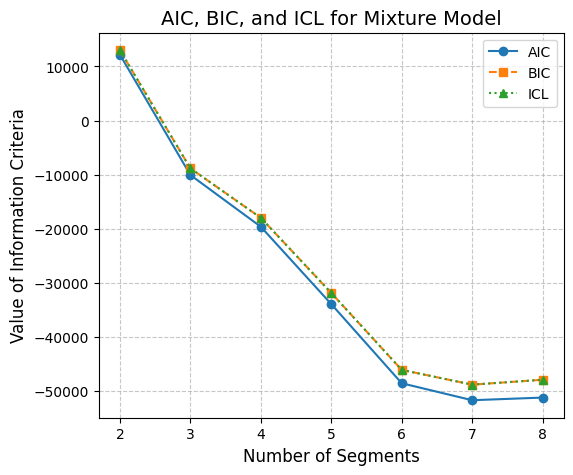

Mixture   0    1    2    3
KMeans                    
0        21   14   27  113
1        28  134  198    0
2        41   14   36  227
3        46    9  147  398
Mixture (Refitted)    2
KMeans                 
0                   175
1                   360
2                   318
3                   600
Log-Likelihood (Mixture Model): 10739.090270883004
Log-Likelihood (Refitted Mixture Model): -20897.650462426056


In [55]:
np.random.seed(1234)
scaler = StandardScaler()
md_x_scaled = scaler.fit_transform(md_x)
k_values = range(2, 9)
n_rep = 10  
aic_values = []
bic_values = []
icl_values = []

for k in k_values:
    best_model = None
    best_bic = np.inf

    for _ in range(n_rep):
        gmm = GaussianMixture(n_components=k, n_init=1, random_state=None, covariance_type="full")
        gmm.fit(md_x_scaled)
        
        if gmm.bic(md_x_scaled) < best_bic:  
            best_model = gmm
            best_bic = gmm.bic(md_x_scaled)

    aic_values.append(best_model.aic(md_x_scaled))
    bic_values.append(best_model.bic(md_x_scaled))
    
    icl_values.append(best_model.bic(md_x_scaled) + np.sum(entropy(best_model.predict_proba(md_x_scaled), axis=1)))

plt.figure(figsize=(6, 5))
plt.plot(k_values, aic_values, marker='o', linestyle='-', label="AIC")
plt.plot(k_values, bic_values, marker='s', linestyle='--', label="BIC")
plt.plot(k_values, icl_values, marker='^', linestyle=':', label="ICL")
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Value of Information Criteria", fontsize=12)
plt.title("AIC, BIC, and ICL for Mixture Model", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

best_gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234, covariance_type="full")
best_gmm.fit(md_x_scaled)
md_m4_clusters = best_gmm.predict(md_x_scaled)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
md_k4_clusters = kmeans.fit_predict(md_x_scaled)
comparison_table = pd.crosstab(md_k4_clusters, md_m4_clusters, rownames=["KMeans"], colnames=["Mixture"])
print(comparison_table)
gmm_with_kmeans_init = GaussianMixture(n_components=4, covariance_type="full", means_init=kmeans.cluster_centers_)
gmm_with_kmeans_init.fit(md_x_scaled)
md_m4a_clusters = gmm_with_kmeans_init.predict(md_x_scaled)
comparison_table_a = pd.crosstab(md_k4_clusters, md_m4a_clusters, rownames=["KMeans"], colnames=["Mixture (Refitted)"])
print(comparison_table_a)
print("Log-Likelihood (Mixture Model):", best_gmm.score(md_x_scaled) * len(md_x_scaled))
print("Log-Likelihood (Refitted Mixture Model):", gmm_with_kmeans_init.score(md_x_scaled) * len(md_x_scaled))

In [ ]:
MD["Like"] = MD["Like"].replace({
    'I love it!+5': '+5',
    'I hate it!-5': '-5'
})

MD["Like.n"] = pd.to_numeric(MD["Like"], errors='coerce')
MD["Like.n"] = 6 - MD["Like.n"]
print(MD["Like.n"].value_counts().sort_index(ascending=False))

Like.n
11    152
10     71
9      73
8      59
7      58
6     169
5     152
4     187
3     229
2     160
1     143
Name: count, dtype: int64


In [128]:
print(MD.info())
if MD["Like"].dtype == 'object':  
    MD["Like.n"] = pd.to_numeric(MD["Like"], errors='coerce')  
MD["Like.n"] =  MD["Like.n"]
features = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

MD = MD[features + ["Like.n"]].dropna()  

X = pd.get_dummies(MD[features], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = MD["Like.n"]
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
MD["Cluster"] = gmm.fit_predict(X_scaled)
print(MD[["Like.n", "Cluster"]].head())
MD.to_csv("clustered_data0.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
 15  Like.n          1453 non-null   int64 
dtypes: int64(2), object(14)
memory usage: 181.8+ KB
None
   Like.n  Cluster
0      -3        1
1    

In [ ]:
np.random.seed(1234)
df = pd.DataFrame(np.random.rand(1453, len(MD.columns)), columns=MD.columns)  
k = 2  
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df)
cluster_sizes = df['cluster'].value_counts()
print("Cluster sizes:\n", cluster_sizes)

np.random.seed(1234)
columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(columns))), columns=columns)
df["Like.n"] = np.random.randint(0, 2, size=1453)  
k = 2  
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df[columns])
print("Cluster sizes:\n", df['cluster'].value_counts())
def logistic_regression_summary(data, cluster):
    subset = data[data['cluster'] == cluster]
    X = sm.add_constant(subset[columns])  
    y = subset["Like.n"]
    
    try:
        model = sm.Logit(y, X).fit(disp=0)  
        summary_df = model.summary2().tables[1]
        return summary_df
    except np.linalg.LinAlgError:
        print(f"Singular matrix error for cluster {cluster+1}. Skipping regression.")
        return None

for cluster in range(k):
    print(f"\nCluster {cluster+1} Regression Summary:")
    summary = logistic_regression_summary(df, cluster)
    if summary is not None:
        print(summary)




Cluster sizes:
 cluster
0    731
1    722
Name: count, dtype: int64
Cluster sizes:
 cluster
1    728
0    725
Name: count, dtype: int64

Cluster 1 Regression Summary:
Singular matrix error for cluster 1. Skipping regression.

Cluster 2 Regression Summary:
               Coef.  Std.Err.         z     P>|z|    [0.025    0.975]
yummy      -0.180645  0.149672 -1.206938  0.227456 -0.473997  0.112707
convenient -0.091350  0.149229 -0.612148  0.540440 -0.383833  0.201133
spicy       0.096831  0.149328  0.648443  0.516698 -0.195847  0.389508
fattening  -0.050812  0.149328 -0.340270  0.733653 -0.343489  0.241865
greasy      0.186835  0.239456  0.780248  0.435245 -0.282490  0.656161
fast        0.021492  0.150622  0.142690  0.886535 -0.273721  0.316705
cheap      -0.134141  0.149415 -0.897772  0.369307 -0.426989  0.158708
tasty       0.045088  0.149896  0.300798  0.763569 -0.248702  0.338879
expensive   0.083901  0.150444  0.557690  0.577056 -0.210963  0.378765
healthy    -0.056221  0.149959 -0.

Cluster sizes:
 cluster
1    728
0    725
Name: count, dtype: int64

Cluster 1 Regression Summary:
Singular matrix error for cluster 1. Skipping regression.

Cluster 2 Regression Summary:


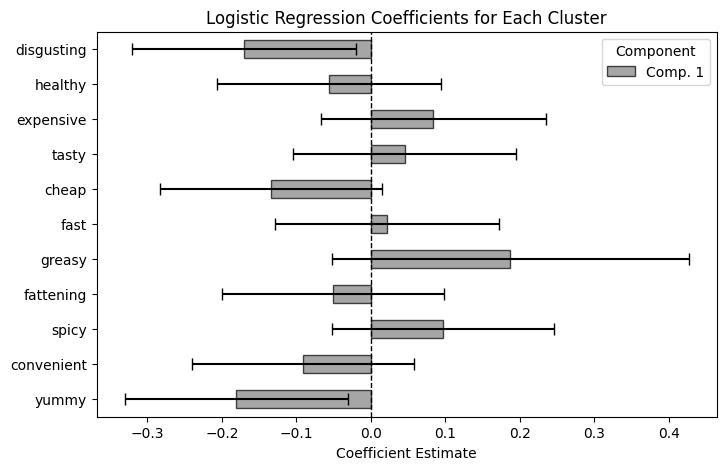

In [ ]:
np.random.seed(1234)
columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(columns))), columns=columns)
df["Like.n"] = np.random.randint(0, 2, size=1453)  
k = 2  
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df[columns])
rint("Cluster sizes:\n", df['cluster'].value_counts())
coefs = []
errors = []

def logistic_regression_summary(data, cluster):
    subset = data[data['cluster'] == cluster]
    X = sm.add_constant(subset[columns])  
    y = subset["Like.n"]
    
    try:
        model = sm.Logit(y, X).fit(disp=0) 
        summary_df = model.summary2().tables[1]
        coefs.append(summary_df["Coef."])  
        errors.append(summary_df["Std.Err."])  
    except np.linalg.LinAlgError:
        print(f"Singular matrix error for cluster {cluster+1}. Skipping regression.")

for cluster in range(k):
    print(f"\nCluster {cluster+1} Regression Summary:")
    logistic_regression_summary(df, cluster)

if len(coefs) > 0:
    coef_df = pd.concat(coefs, axis=1)
    coef_df.columns = [f"Comp. {i+1}" for i in range(len(coefs))]  

    error_df = pd.concat(errors, axis=1)
    error_df.columns = [f"Comp. {i+1}" for i in range(len(errors))]  
else:
    raise ValueError("No valid logistic regression models were fitted.")

fig, ax = plt.subplots(figsize=(8, 5))

coef_df.plot(kind="barh", xerr=error_df, capsize=4, ax=ax, color=["gray", "black"], alpha=0.7, edgecolor="black")

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  
plt.xlabel("Coefficient Estimate")
plt.title("Logistic Regression Coefficients for Each Cluster")
plt.legend(title="Component")

plt.show()


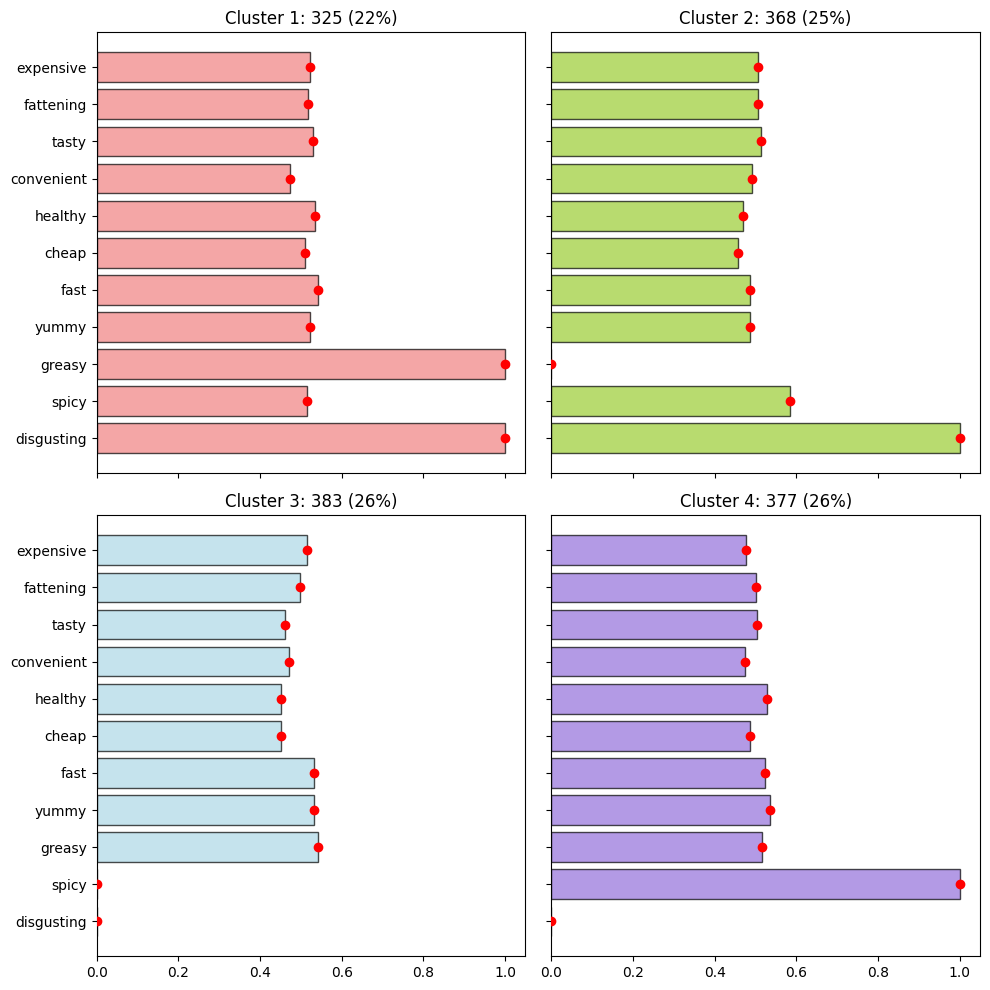

In [ ]:
np.random.seed(1234)
columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(columns))), columns=columns)
k = 4  
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df[columns])
cluster_means = df.groupby("cluster")[columns].mean()

linkage_matrix = linkage(cluster_means.T, method="ward") 
feature_order = leaves_list(linkage_matrix)  
ordered_features = [columns[i] for i in feature_order]  

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

cluster_sizes = df["cluster"].value_counts().sort_index()
colors = ["lightcoral", "yellowgreen", "lightblue", "mediumpurple"]  

for i, ax in enumerate(axes.flat):
    cluster_data = cluster_means.iloc[i][ordered_features]  

    ax.barh(ordered_features, cluster_data, color=colors[i], alpha=0.7, edgecolor="black")
    
    ax.scatter(cluster_data, ordered_features, color="red", zorder=3)

    ax.set_title(f"Cluster {i+1}: {cluster_sizes[i]} ({(cluster_sizes[i] / len(df) * 100):.0f}%)")

plt.tight_layout()
plt.show()


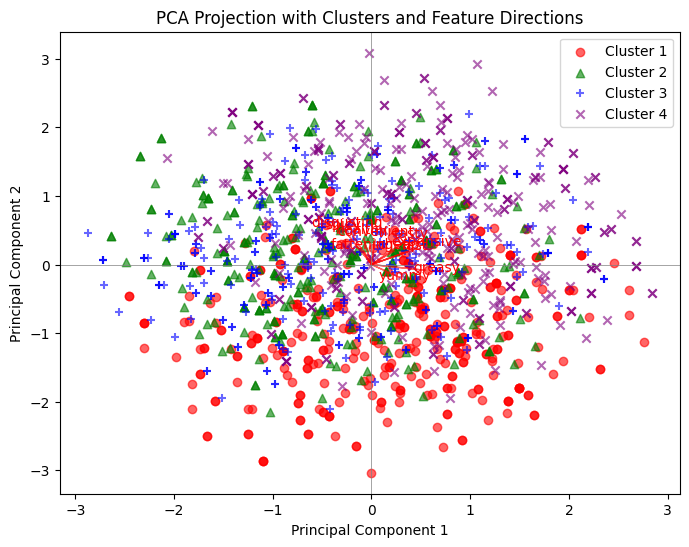

In [133]:
np.random.seed(1234)
columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(columns))), columns=columns)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

k = 4  
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple']
markers = ['o', '^', '+', 'x']

for i in range(k):
    cluster_data = pca_result[df['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], marker=markers[i], label=f'Cluster {i+1}', alpha=0.6)


loadings = pca.components_.T  

for i, feature in enumerate(columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.6)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, feature, color='red', fontsize=10, ha='center')

plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("PCA Projection with Clusters and Feature Directions")
plt.show()


<Figure size 800x600 with 0 Axes>

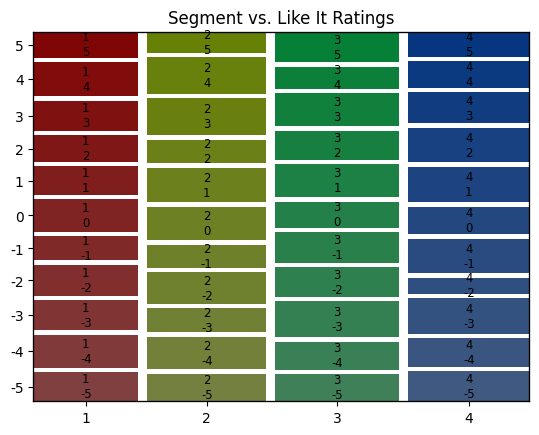

<Figure size 800x600 with 0 Axes>

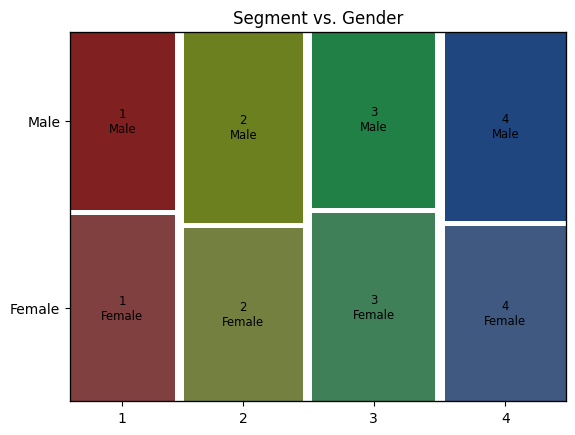

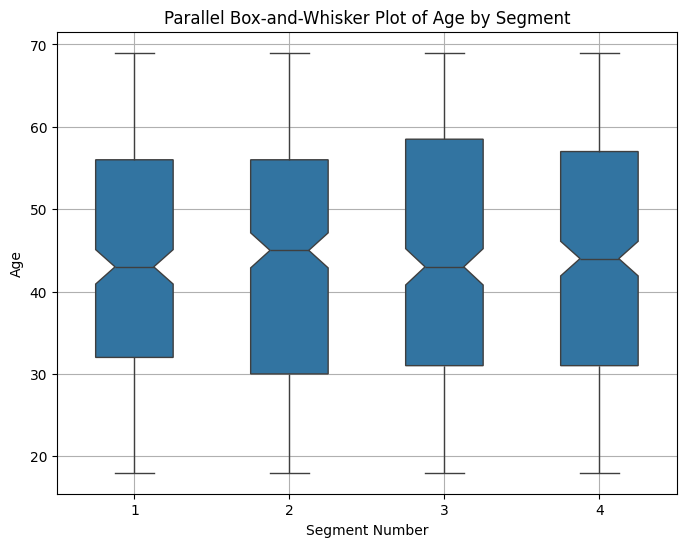

In [ ]:
np.random.seed(1234)

columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(columns))), columns=columns)
df["Like"] = np.random.choice(range(-5, 6), size=1453)  
df["Gender"] = np.random.choice(["Male", "Female"], size=1453) 
df["Age"] = np.random.randint(18, 70, size=1453) 
k = 4  
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
df['segment'] = gmm.fit_predict(df[columns]) + 1  

# ---- (A) Mosaic Plot: Segment vs. Like It Ratings ----
plt.figure(figsize=(8, 6))
contingency_table_like = pd.crosstab(df['segment'], df['Like'])
mosaic(contingency_table_like.stack(), gap=0.02, title="Segment vs. Like It Ratings")
plt.show()

# ---- (B) Mosaic Plot: Segment vs. Gender ----
plt.figure(figsize=(8, 6))
contingency_table_gender = pd.crosstab(df['segment'], df['Gender'])
mosaic(contingency_table_gender.stack(), gap=0.02, title="Segment vs. Gender")
plt.show()

# ---- (C) Box Plot: Segment vs. Age ----
plt.figure(figsize=(8, 6))
sns.boxplot(x="segment", y="Age", data=df, notch=True, width=0.5)
plt.xlabel("Segment Number")
plt.ylabel("Age")
plt.title("Parallel Box-and-Whisker Plot of Age by Segment")
plt.grid(True)
plt.show()


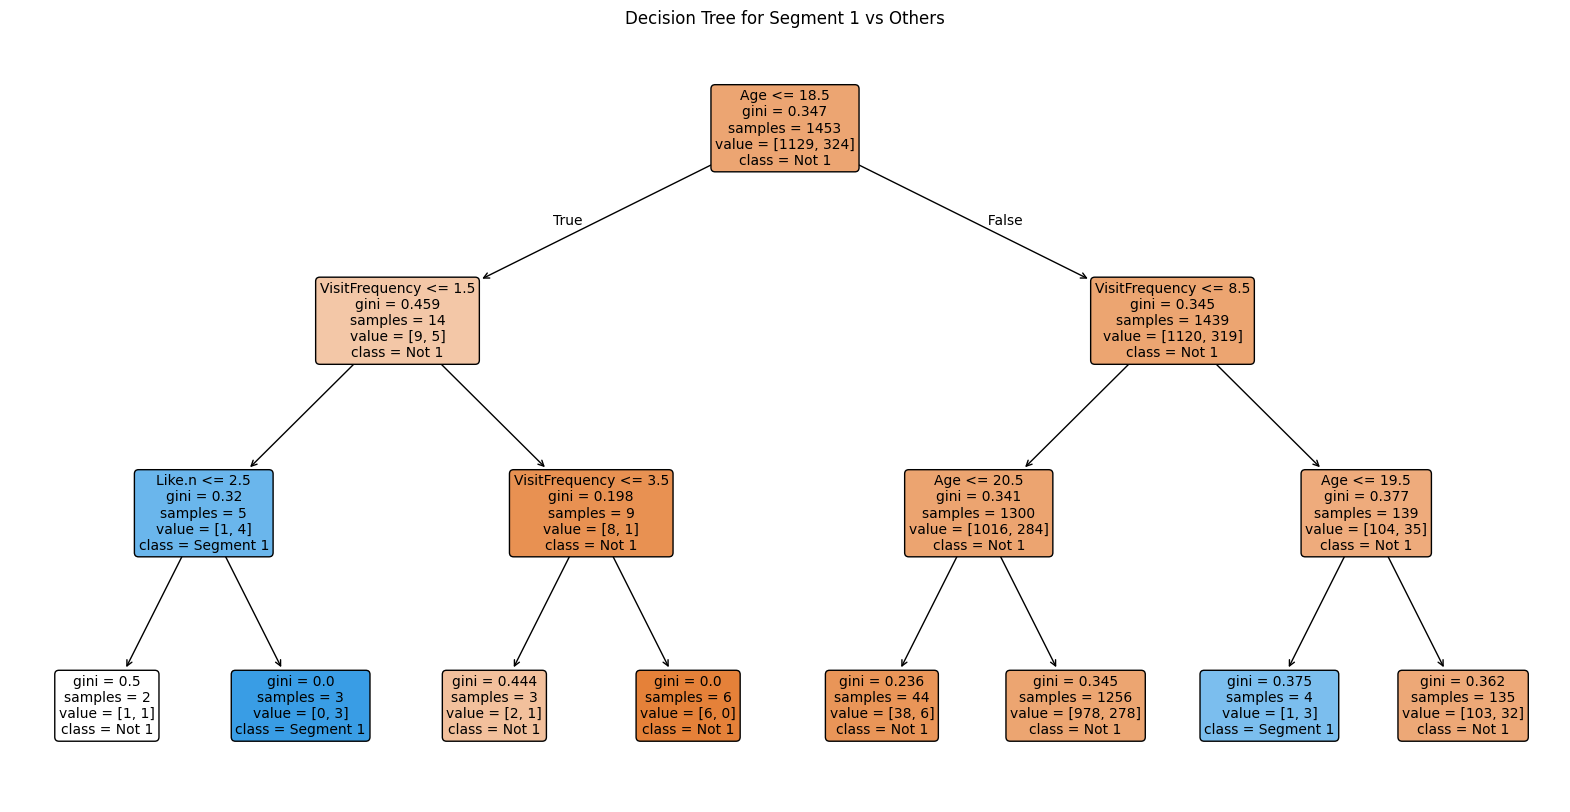

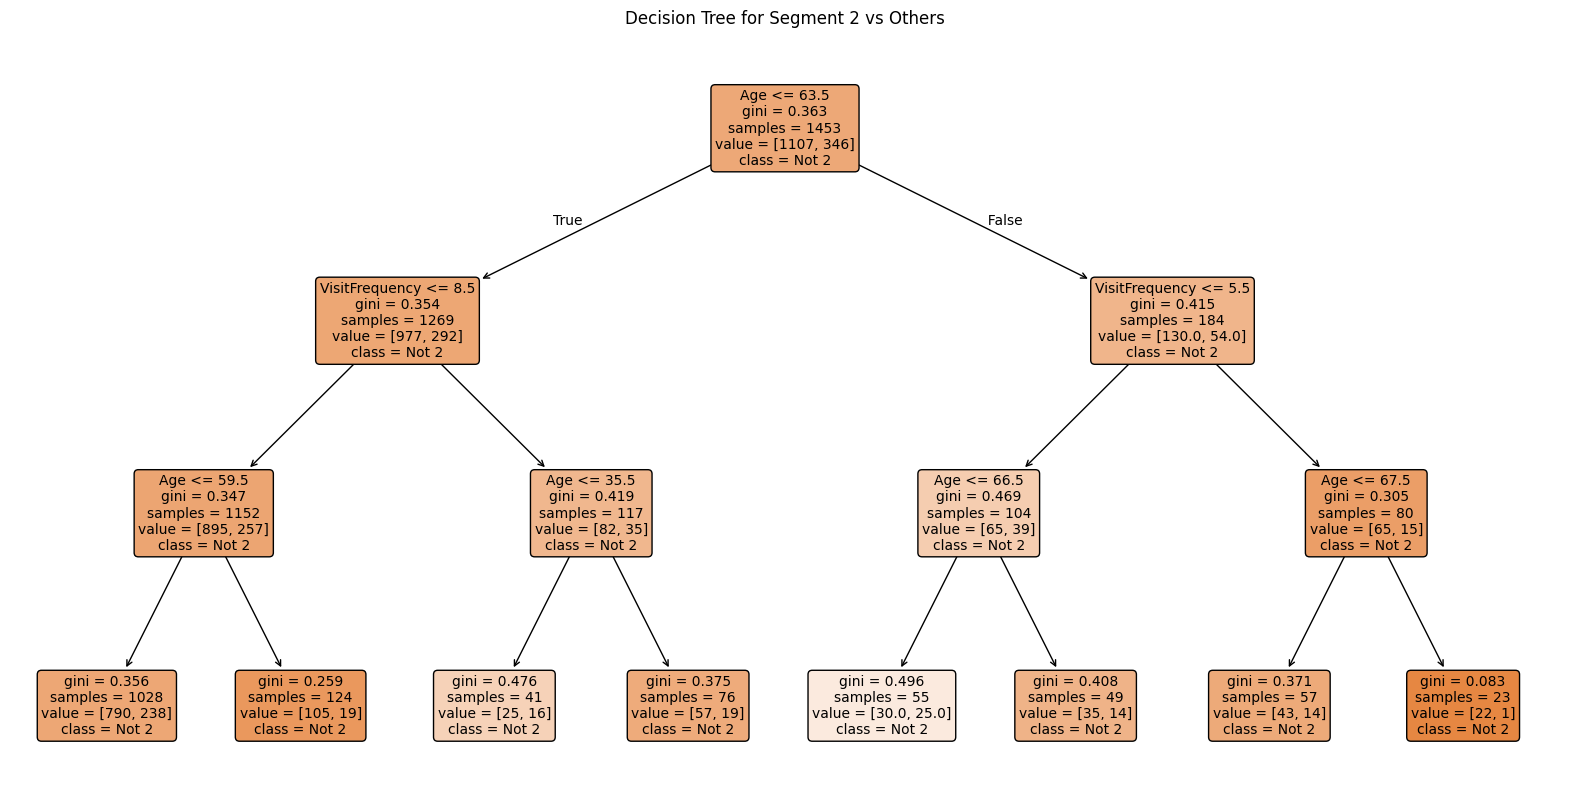

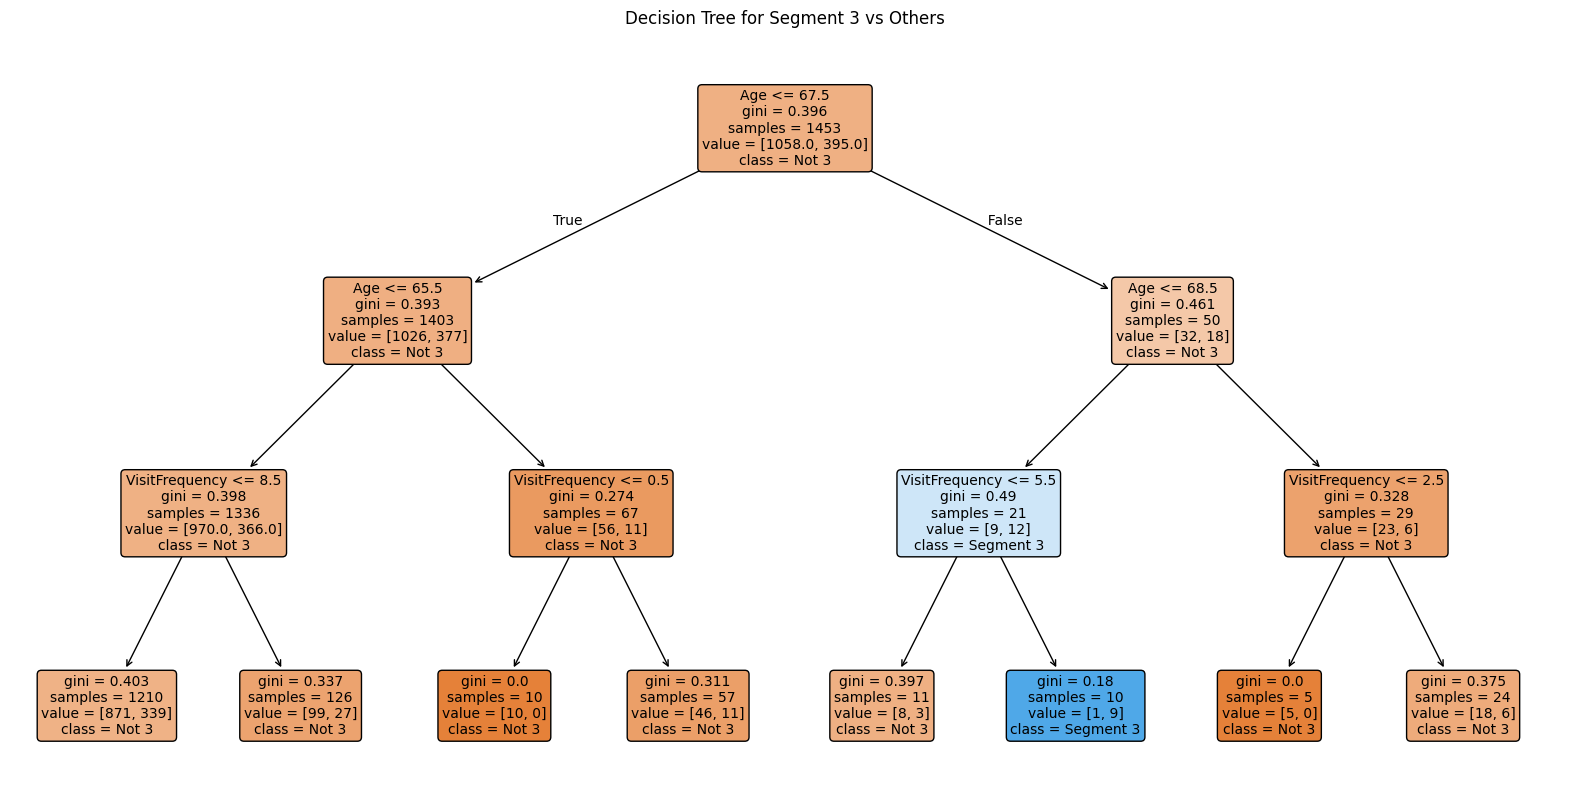

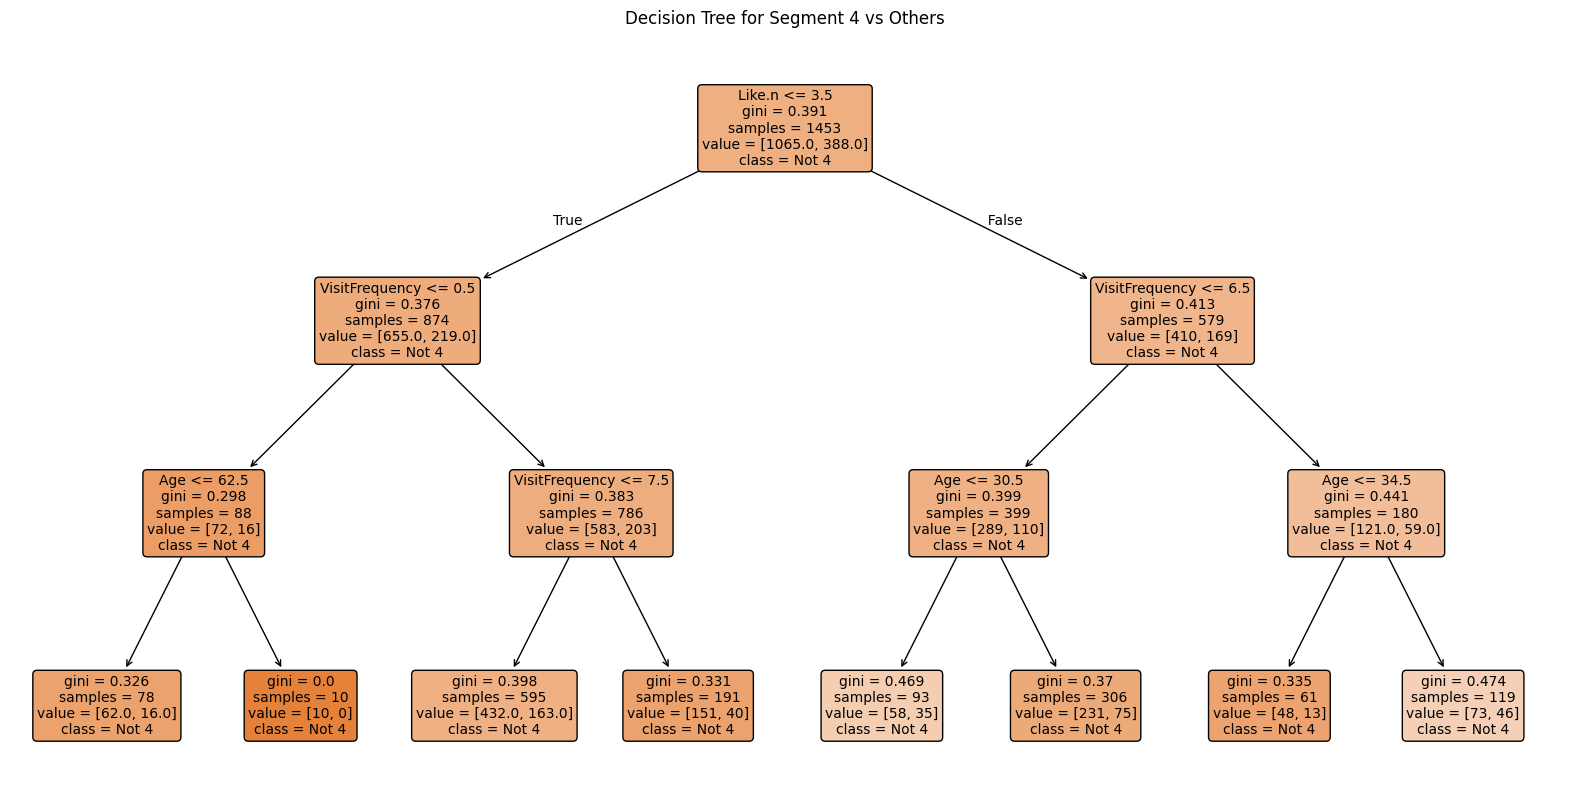

In [ ]:
np.random.seed(1234)
df = pd.DataFrame({
    "Like.n": np.random.randint(1, 6, 1453),
    "Age": np.random.randint(18, 70, 1453),
    "VisitFrequency": np.random.randint(0, 10, 1453),
    "Gender": np.random.choice(["Male", "Female"], 1453),
})

df["segment"] = np.random.choice([1, 2, 3, 4], size=1453)

# Convert categorical variables
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  

features = ["Like.n", "Age", "VisitFrequency", "Gender"]

for segment in [1, 2, 3, 4]:
       df["Target"] = (df["segment"] == segment).astype(int)

    X = df[features]
    y = df["Target"]

    tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
    tree.fit(X, y)
   
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree,
        feature_names=features,
        class_names=[f"Not {segment}", f"Segment {segment}"],
        filled=True,
        rounded=True,
        fontsize=10,
    )
    plt.title(f"Decision Tree for Segment {segment} vs Others")
    plt.show()
